In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression

In [42]:
df=pd.read_csv("economic_index.csv")

In [43]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [44]:
df.drop(['year','month'],axis=1,inplace=True)

In [45]:
df.head()

,Unnamed: 0,interest_rate,unemployment_rate,index_price
0,0,2.75,5.3,1464
1,1,2.50,5.3,1394
2,2,2.50,5.3,1357
3,3,2.50,5.3,1293
4,4,2.50,5.4,1256


In [46]:
df.isnull().sum()

Unnamed: 0           0
interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

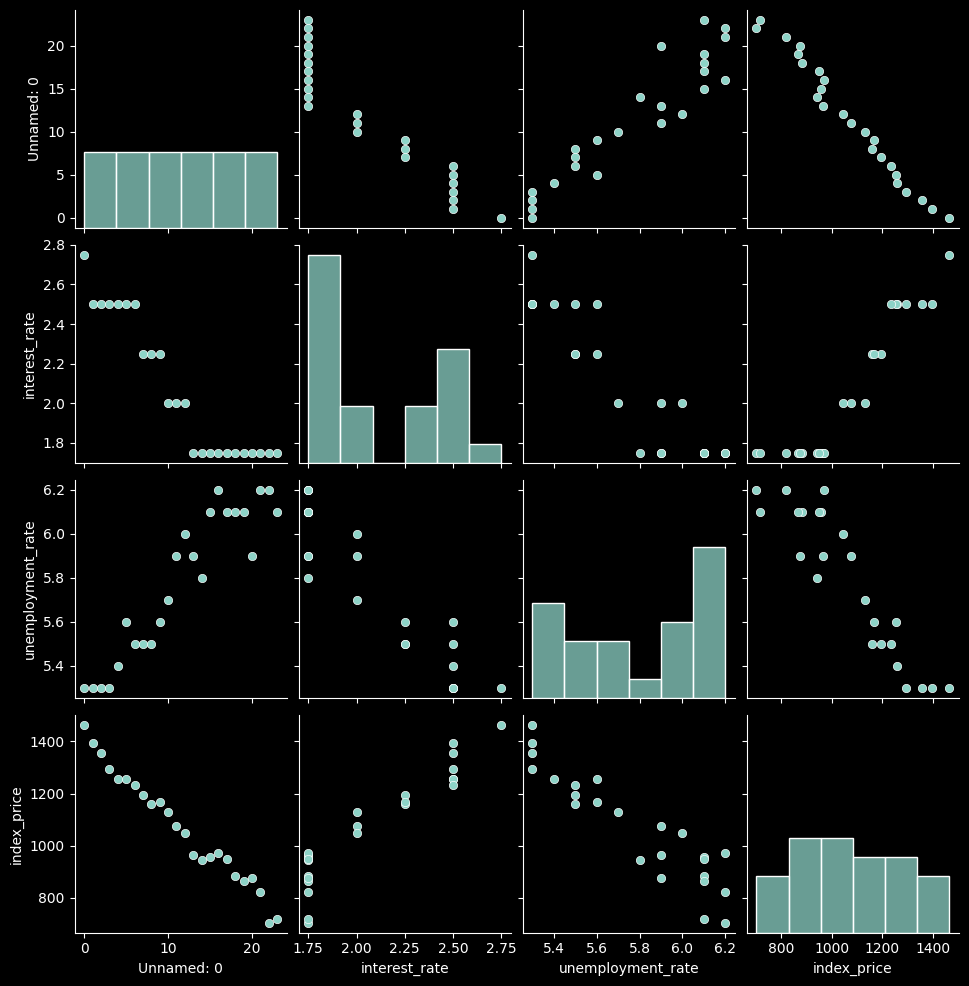

In [47]:
sns.pairplot(df)

In [48]:
df.corr()

,Unnamed: 0,interest_rate,unemployment_rate,index_price
Unnamed: 0,1.000000,-0.934555,0.935300,-0.988246
interest_rate,-0.934555,1.000000,-0.925814,0.935793
unemployment_rate,0.935300,-0.925814,1.000000,-0.922338
index_price,-0.988246,0.935793,-0.922338,1.000000


## Observation
* As intrest rate increases index_price decreases
* As interest rate decreases

In [49]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1:]


In [50]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

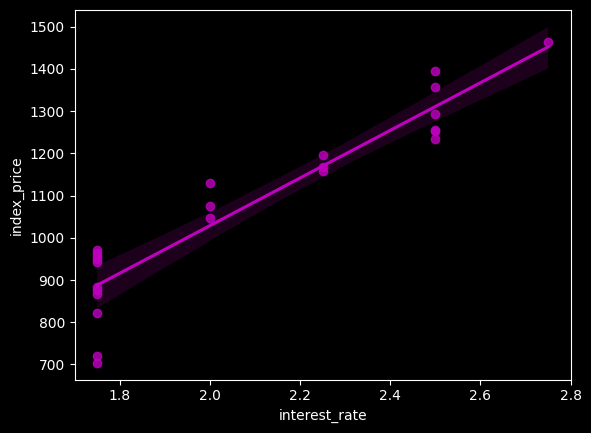

In [51]:
sns.regplot(x=df['interest_rate'], y=df['index_price'],color='m')

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

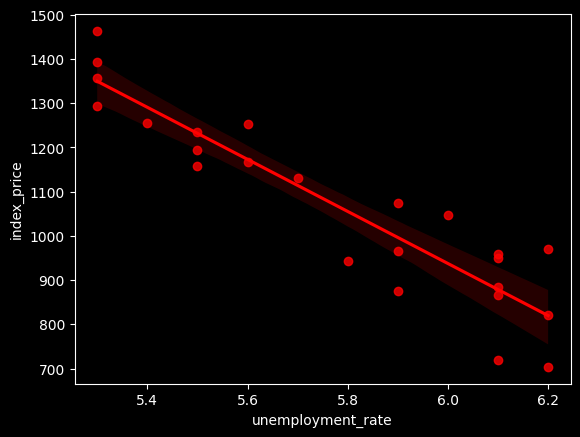

In [52]:
sns.regplot(x=df['unemployment_rate'],y=df['index_price'],color='r')

In [53]:
model=LinearRegression(n_jobs=-1)
model.fit(x_train,y_train)

LinearRegression(n_jobs=-1)

In [54]:
validation_score=cross_val_score(estimator=model,X=x_train,y=y_train,scoring='neg_mean_squared_error',cv=3)

In [55]:
validation_score.mean()

np.float64(-1396.534179491835)

In [56]:
y_pred=model.predict(x_test)

In [57]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_true=y_test,y_pred=y_pred)
rmse=np.sqrt(mse)
r_2=r2_score(y_test,y_pred)
print(f"Mean Absolute Error is {mae}")
print(f"Mean Squared Error is {mse}")
print(f"Root mean squared Error is {rmse}")
print(f"R2 Score is {r_2}")

Mean Absolute Error is 24.94321491852429
Mean Squared Error is 1058.3227725673314
Root mean squared Error is 32.531873179504
R2 Score is 0.9685628025654792
